In [8]:
from GapFill_2014_CBI_WL import *

filepath = r'/Users/rprocious/Waterlevels_CBI/CBI-2/Gap_Filling/pd_1732232133.csv' #input('Insert Filepath to Water Level Dataset: ')

try:
    # Call the gap-filling function
    filled_df, wl_dataset, all_gaps, dataset_LF, poly_wl, filled_gap_list, adjusted_gaps = cbi_gapfill(filepath)
    print("Gap filling completed. Here's a preview of the data:")
    print(filled_df.head())
    print(wl_dataset.head())
except FileNotFoundError:
    print(f"Error: File not found at the given path: {filepath}")
except Exception as e:
    if str(e) == 'No objects to concatenate':
        print('No gaps with back up water levels avaliable, try another method')
    else:
        print(f"An error occurred: {e}, please try again")



Reading dataset
Gaps Created
Total number of gaps:  166
Number of Linear Gaps filled: 8
Single gaps filled
132
Number of gaps with backup water level: 132
Can not fill gap out of bounds
Can not fill gap out of bounds
Can not fill gap out of bounds
Can not fill gap out of bounds
Can not fill gap out of bounds
Gaps filled 127
Gap filling completed. Here's a preview of the data:
                 date    pwl    bwl  harmwl  pwl surge  bwl surge  mwl  \
0 2016-01-01 00:00:00  1.805  2.619   1.436      0.369      1.183  NaN   
1 2016-01-01 00:06:00  1.808  2.622   1.441      0.367      1.181  NaN   
2 2016-01-01 00:12:00  1.826  2.634   1.446      0.380      1.188  NaN   
3 2016-01-01 00:18:00  1.843  2.647   1.451      0.392      1.196  NaN   
4 2016-01-01 00:24:00  1.850  2.650   1.456      0.394      1.194  NaN   

   mwl adjusted  new wl adjustment  new wl  
0           NaN              1.805   1.805  
1           NaN              1.808   1.808  
2           NaN              1.826   1.82

In [9]:
filled_df['pwl actual'] = wl_dataset['pwl']
filled_df['error'] = abs((filled_df['mwl'] - filled_df['pwl actual']) / filled_df['pwl actual']) *100
filled_df['adjusted error'] = abs((filled_df['mwl adjusted'] - filled_df['pwl actual']) / filled_df['pwl actual']) *100
filled_df

,date,pwl,bwl,harmwl,pwl surge,bwl surge,mwl,mwl adjusted,new wl adjustment,new wl,pwl actual,error,adjusted error
0,2016-01-01 00:00:00,1.805,2.619,1.436,0.369,1.183,NaN,NaN,1.805,1.805,1.805,NaN,NaN
1,2016-01-01 00:06:00,1.808,2.622,1.441,0.367,1.181,NaN,NaN,1.808,1.808,1.808,NaN,NaN
2,2016-01-01 00:12:00,1.826,2.634,1.446,0.380,1.188,NaN,NaN,1.826,1.826,1.826,NaN,NaN
3,2016-01-01 00:18:00,1.843,2.647,1.451,0.392,1.196,NaN,NaN,1.843,1.843,1.843,NaN,NaN
4,2016-01-01 00:24:00,1.850,2.650,1.456,0.394,1.194,NaN,NaN,1.850,1.850,1.850,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2016-12-31 23:30:00,2.011,2.756,1.536,0.475,1.220,NaN,NaN,2.011,2.011,2.011,NaN,NaN
87836,2016-12-31 23:36:00,2.024,2.766,1.541,0.483,1.225,NaN,NaN,2.024,2.024,2.024,NaN,NaN
87837,2016-12-31 23:42:00,2.022,2.765,1.546,0.476,1.219,NaN,NaN,2.022,2.022,2.022,NaN,NaN
87838,2016-12-31 23:48:00,2.029,2.770,1.551,0.478,1.219,NaN,NaN,2.029,2.029,2.029,NaN,NaN


In [34]:
filled_df[82518:82520]

,date,pwl,bwl,harmwl,pwl surge,bwl surge,mwl,mwl adjusted,new wl adjustment,new wl,pwl actual,error,adjusted error
82518,2016-12-09 19:48:00,NaN,2.675,1.622,0.258,1.053,1.891225,2.239432,2.239432,1.891225,1.880,0.597089,19.118729
82519,2016-12-09 19:54:00,NaN,2.678,1.619,0.266,1.059,1.895358,2.244684,2.244684,1.895358,1.885,0.549498,19.081361


Text(0.5, 1.0, 'Filled gap')

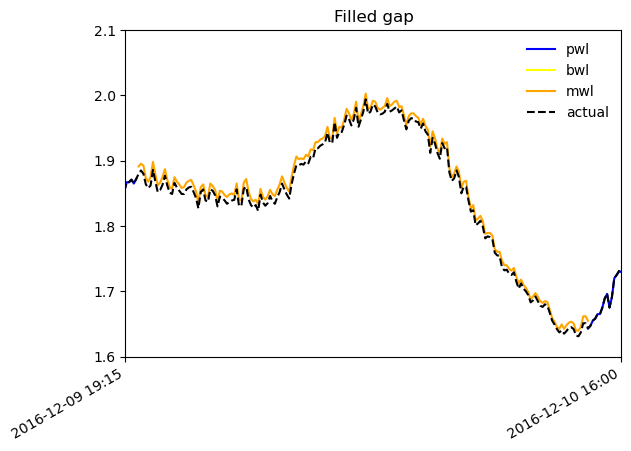

In [49]:
plt.plot(filled_df['date'], filled_df['pwl'], color = 'blue', label = 'pwl')
plt.plot(filled_df['date'], filled_df['bwl'], color = 'yellow', label = 'bwl')
plt.plot(filled_df['date'],filled_df['mwl'], color = 'orange', label = 'mwl')#, linestyle = 'dashed')
plt.plot(filled_df['date'],filled_df['pwl actual'], color = 'black', label = 'actual', linestyle = 'dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,2.1)

start_date = pd.to_datetime('2016-12-09 19:15:00')

end_date = pd.to_datetime('2016-12-10 16:00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Filled gap')

In [11]:
adjusted_gaps

[(2285, 50),
 (2738, 100),
 (4933, 50),
 (5622, 100),
 (5936, 191),
 (7036, 50),
 (7758, 113),
 (11712, 50),
 (12356, 100),
 (12570, 100),
 (13326, 100),
 (14244, 131),
 (15666, 50),
 (15905, 100),
 (16657, 50),
 (16722, 100),
 (17189, 100),
 (17461, 50),
 (17597, 50),
 (18070, 100),
 (18290, 50),
 (18377, 50),
 (19353, 100),
 (19515, 50),
 (19964, 100),
 (22363, 100),
 (23194, 100),
 (25074, 125),
 (25352, 50),
 (25406, 171),
 (25798, 100),
 (27465, 50),
 (27730, 50),
 (28816, 50),
 (30980, 100),
 (31698, 50),
 (32091, 10),
 (32291, 100),
 (32700, 100),
 (33012, 106),
 (33307, 50),
 (34389, 100),
 (34756, 100),
 (35695, 171),
 (36340, 100),
 (36553, 100),
 (37426, 50),
 (37840, 100),
 (38860, 50),
 (39050, 100),
 (39577, 10),
 (39625, 100),
 (39887, 100),
 (40519, 85),
 (41405, 50),
 (42542, 124),
 (43234, 100),
 (43652, 10),
 (43721, 100),
 (43968, 112),
 (44674, 100),
 (45361, 100),
 (46453, 100),
 (46923, 5),
 (46935, 100),
 (47102, 100),
 (47559, 167),
 (48330, 100),
 (48746, 10),